# Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [4]:
louvain = skn.clustering.Louvain(engine='python')
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='python'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [5]:
labels = louvain.labels_
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [6]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]


**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

In [9]:
colors = ['r','g','b','c','m','y']

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


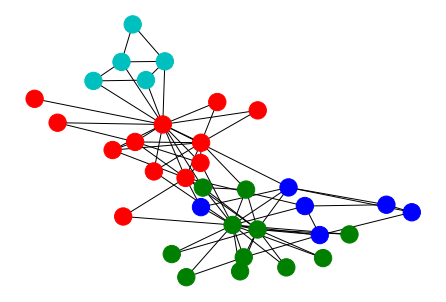

In [10]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

**Metrics**

In [11]:
modularity = skn.clustering.modularity

In [12]:
modularity(adjacency,labels)

0.41880341880341876

**Parameters**

In [13]:
# default engine = numba if available
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [14]:
# resolution parameter
louvain = skn.clustering.Louvain(resolution=2)
louvain.fit(adjacency)
labels = louvain.labels_
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3 4 5 6] [7 7 6 6 4 2 2]


## Directed graphs

**Loading**

In [16]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [17]:
louvain = skn.clustering.Louvain()
louvain.fit(adjacency)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [18]:
labels = louvain.labels_
print(labels)

[2 0 1 0 1 1 3 0 2 1 2 0 0 3]


In [19]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [5 4 3 2]


**Visualization**

In [20]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [21]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

In [22]:
colors = ['r','g','b','c','m','y']

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


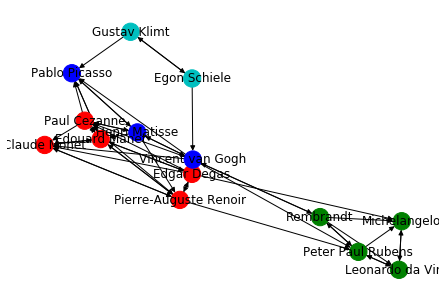

In [23]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph],labels = names)

**Metrics**

In [24]:
modularity(adjacency,labels)

0.3151999999999999

## Bipartite graphs

**Loading**

In [25]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [28]:
bilouvain = skn.clustering.BiLouvain()
bilouvain.fit(biadjacency)

BiLouvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [30]:
labels = bilouvain.labels_
secondary_labels = bilouvain.col_labels_
print(labels, secondary_labels)

[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]


In [31]:
unique_labels, counts = np.unique(labels, return_counts = True)
_, secondary_counts = np.unique(secondary_labels, return_counts = True)
print(unique_labels, counts, secondary_counts)

[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]


In [33]:
# Graph as undirected (ignoring the bipartite structure)
louvain = skn.clustering.Louvain()
louvain.fit(skn.utils.adjacency_formats.bipartite2undirected(biadjacency))

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [35]:
labels_undirected = louvain.labels_[:biadjacency.shape[0]]
secondary_labels_undirected = louvain.labels_[biadjacency.shape[0]:]
print(labels_undirected, secondary_labels_undirected)

[2 2 0 0 2 0 0 0 1 3 1 1 1 3 3] [2 2 2 0 0 0 2 0 0 1 1 3 3 1 3 1]


In [36]:
unique_labels_undirected, counts_undirected = np.unique(labels_undirected, return_counts = True)
_,secondary_counts_undirected = np.unique(secondary_labels_undirected, return_counts = True)
print(unique_labels_undirected, counts_undirected, secondary_counts_undirected)

[0 1 2 3] [5 4 3 3] [5 4 4 3]


**Visualization**

In [37]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [38]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [39]:
graph = from_scipy_sparse_matrix(adjacency)

In [40]:
colors = ['r','g','b','c','m','y']

In [41]:
n1,n2 = biadjacency.shape
pos = {i: (0,i) for i in range(n1)} 
pos.update({n1 + i: (2,i) for i in range(n2)})

In [42]:
pos_labels = {i: (0.5,i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5,i) for i in range(n2)})

In [43]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


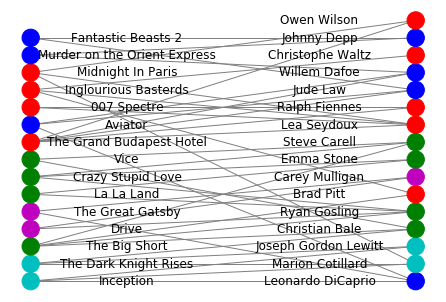

In [44]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels, secondary_labels)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

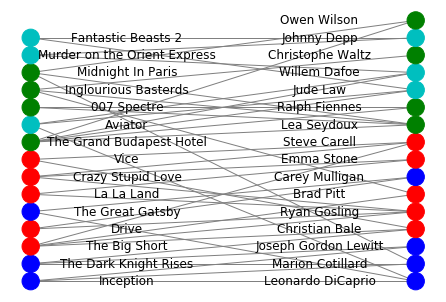

In [45]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels_undirected, secondary_labels_undirected)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

**Metrics**

In [46]:
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [49]:
skn.clustering.modularity(biadjacency, labels, secondary_labels)

ValueError: The adjacency must be a square matrix.

In [ ]:
modularity(biadjacency, labels_undirected, secondary_labels_undirected)

In [ ]:
# Bipartite graph seen as undirected graph
modularity(biadjacency, labels, secondary_labels, force_undirected=True)

In [ ]:
# Check
modularity(adjacency, np.append(labels, secondary_labels))

In [ ]:
modularity(biadjacency, labels_undirected, secondary_labels_undirected, force_undirected=True)